# Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#Loading the data
df = pd.read_excel('mhs.xls')

In [3]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## Exploratory Data Analysis (EDA) 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [8]:
df['RiskLevel'] = df['RiskLevel'].apply(lambda x: 2 if x=='high risk' else 1 if x=='mid risk' else 0)

In [9]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


<AxesSubplot: >

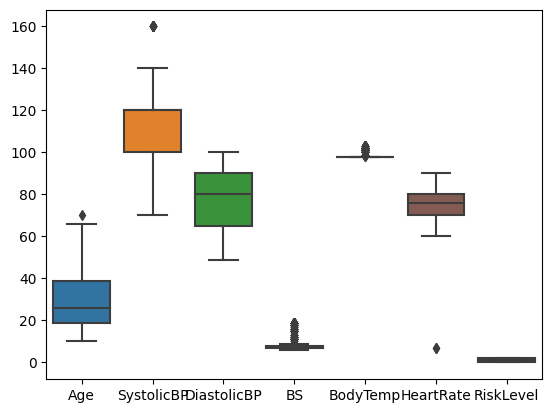

In [10]:
sns.boxplot(df)

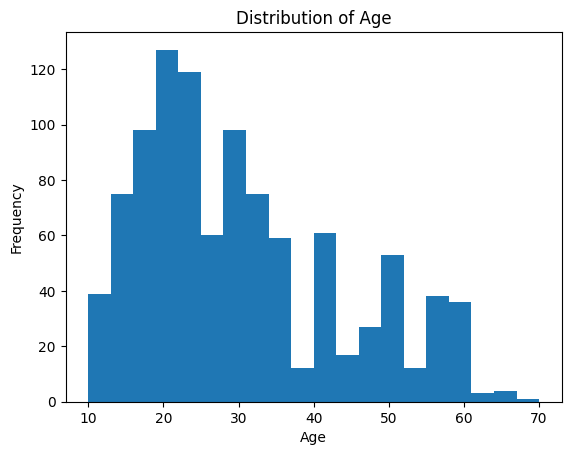

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a histogram to visualize the distribution of age
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()
plt.savefig('Distribution of Age.png')

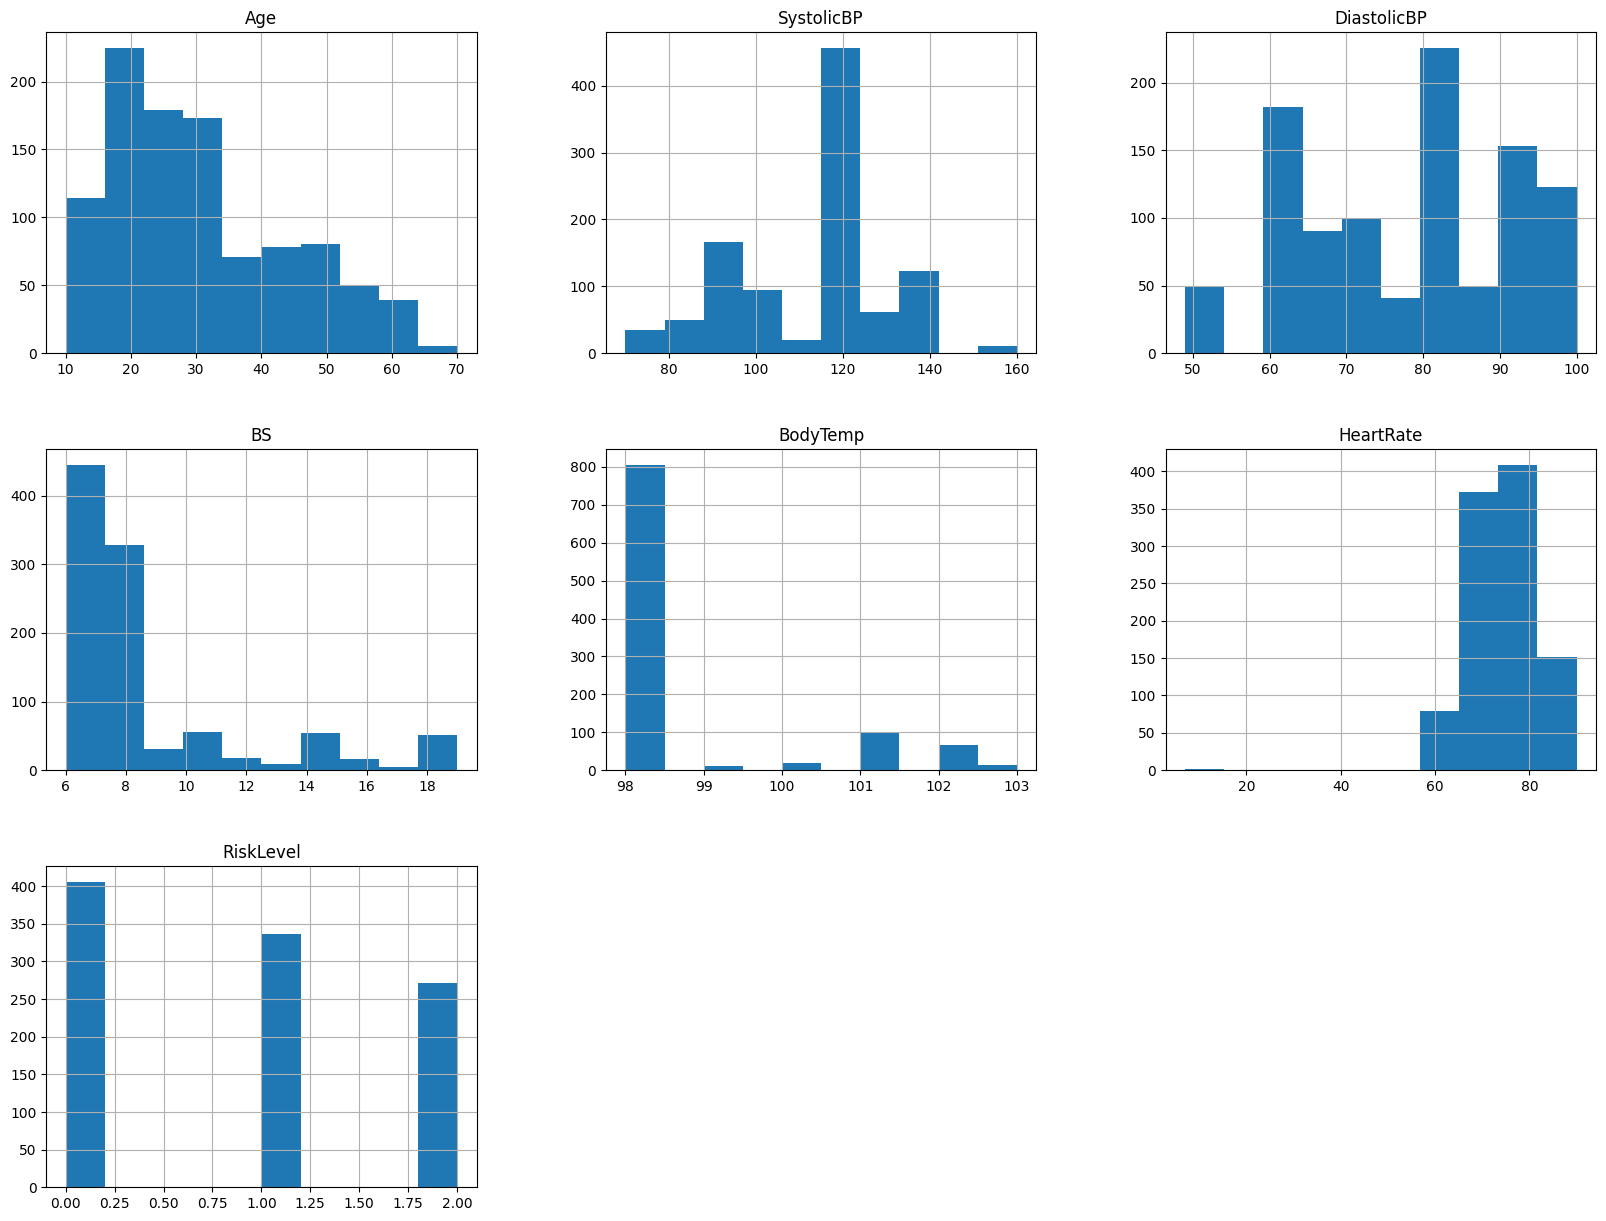

In [12]:
#checking the distribution of the numerical values

df.hist(figsize = (20,15))
df.plot

In [13]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


<AxesSubplot: >

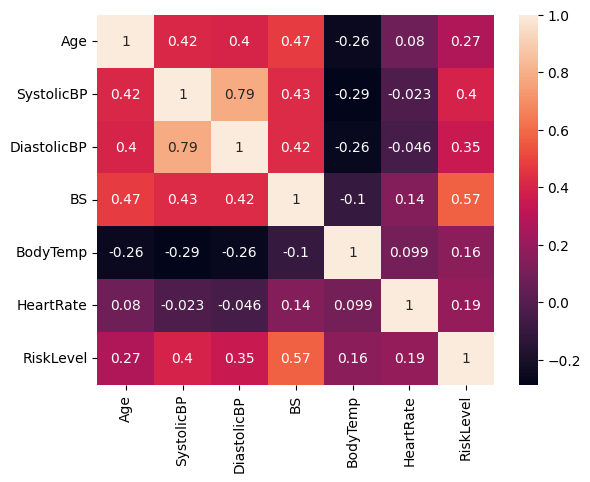

In [14]:
sns.heatmap(df.corr(), annot = True)

# Linear Regression Model for Systolic BP


In [15]:
#We define our X and Y variable
X = df.drop(['SystolicBP','BodyTemp', 'HeartRate'], axis=1)
y = df['SystolicBP']

In [16]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_scaled = pd.DataFrame(std.fit_transform(X), columns = X.columns)

In [17]:
X_scaled.head()

,Age,DiastolicBP,BS,RiskLevel
0,-0.361738,0.255023,1.905890,1.402991
1,0.380777,0.975539,1.298340,1.402991
2,-0.064732,-0.465493,-0.220537,1.402991
3,0.009519,0.615281,-0.524312,1.402991
4,0.380777,-1.186009,-0.797710,-1.075464


In [18]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [20]:
print('length of the total data is ', len(X))
print('length of the total data is ', len(X_train))
print('length of the total data is ', len(X_test))

length of the total data is  1014
length of the total data is  811
length of the total data is  203


In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

#making prediction on the test set
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Linear Regression R squared of the test set is: {:.2f}'.format(r2_score(y_test, y_pred)))
print('Linear Regression RMSE of the test set is: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Linear Regression MAE of the test set is: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.74
Linear Regression RMSE of the test set is: 9.74
Linear Regression MAE of the test set is: 7.71


In [22]:
X2 = X_scaled.drop('RiskLevel', axis=1)
X2.head()

,Age,DiastolicBP,BS
0,-0.361738,0.255023,1.905890
1,0.380777,0.975539,1.298340
2,-0.064732,-0.465493,-0.220537
3,0.009519,0.615281,-0.524312
4,0.380777,-1.186009,-0.797710


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=20)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [24]:
#Making predictions on the test set

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Linear Regression R squared of the test set is: {:.2f}'.format(r2_score(y_test, y_pred)))
print('Linear Regression RMSE of the test set is: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Linear Regression MAE of the test set is: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.72
Linear Regression RMSE of the test set is: 10.05
Linear Regression MAE of the test set is: 7.91


# PCA


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

x = df.loc[:, features].values
y = df.loc[:,['SystolicBP']].values
x = StandardScaler().fit_transform(x)

x

array([[-0.36173812,  0.25502279,  1.90589019, -0.4852155 ,  1.44695615],
       [ 0.38077697,  0.97553854,  1.29833966, -0.4852155 , -0.53208757],
       [-0.06473208, -0.46549297, -0.22053665,  0.97388449,  0.70481475],
       ...,
       [ 0.38077697, -1.18600873,  3.12099124, -0.4852155 ,  1.44695615],
       [ 0.97478904,  0.97553854,  2.81721597, -0.4852155 , -0.53208757],
       [ 0.15802244, -0.82575085, -0.82808717,  1.70343448,  0.21005383]])

In [26]:
#Applying PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a new dataframe with principal components
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

pca_df

,PC1,PC2
0,-0.001414,-5.849929
1,13.818028,-5.412039
2,-5.349732,3.752898
3,6.128148,-5.775949
4,-8.813722,14.931252
...,...,...
1009,-16.581735,5.610077
1010,27.909836,9.301652
1011,-7.338471,15.189508
1012,19.789105,0.535565


In [27]:
#Explained Variance

print(pca.explained_variance_ratio_)

[0.68716453 0.29167945]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=20)

from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

#Making predictions on the test set

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Linear Regression R squared of the test set is: {:.2f}'.format(r2_score(y_test, y_pred)))
print('Linear Regression RMSE of the test set is: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Linear Regression MAE of the test set is: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.72
Linear Regression RMSE of the test set is: 9.99
Linear Regression MAE of the test set is: 7.91


## Relationship between age and heart rate


In [29]:
df['Age_group'] = df['Age'].apply(lambda a: 'Children' if a <= 12 else ('Teanager' if a <= 20 else ('Maternal Age' if a <= 35 else ('Advanced maternal Age' if a > 35 else ('Post-menopause Adult' if a <= 64 else 'Older Adult')))))

df.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group
443,32,120,90,6.8,98.0,70,0,Maternal Age
748,19,120,80,7.0,98.0,70,1,Teanager
302,48,120,80,11.0,98.0,88,2,Advanced maternal Age
241,19,90,65,11.0,101.0,70,2,Teanager
908,16,120,75,7.9,98.0,7,0,Teanager
65,29,130,70,6.7,98.0,78,1,Maternal Age
316,22,120,60,15.0,98.0,80,2,Maternal Age
556,60,120,80,7.5,98.0,75,0,Advanced maternal Age
105,34,85,60,11.0,102.0,86,2,Maternal Age
671,15,100,49,6.8,99.0,77,0,Teanager


In [30]:
df['Age_group'].unique()

array(['Maternal Age', 'Advanced maternal Age', 'Teanager', 'Children'],
      dtype=object)

In [31]:
mean_HeartRate = df.groupby('Age_group')['HeartRate'].mean()

mean_HeartRate

Age_group
Advanced maternal Age    75.518657
Children                 67.205128
Maternal Age             74.656180
Teanager                 73.511450
Name: HeartRate, dtype: float64

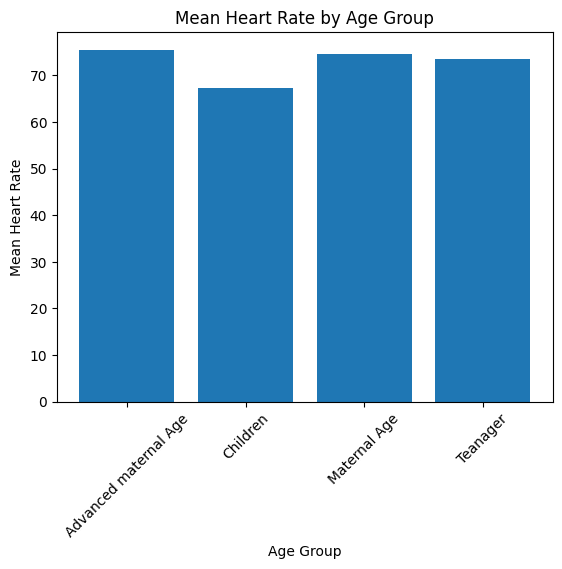

<Figure size 640x480 with 0 Axes>

In [32]:
# Creating a bar chart to show the mean heart rate for each age group
plt.bar(mean_HeartRate.index, mean_HeartRate.values)
plt.xlabel('Age Group')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rate by Age Group')
plt.xticks(rotation = 45)
plt.show()
plt.savefig('Mean Heart Rate by Age Group.png')

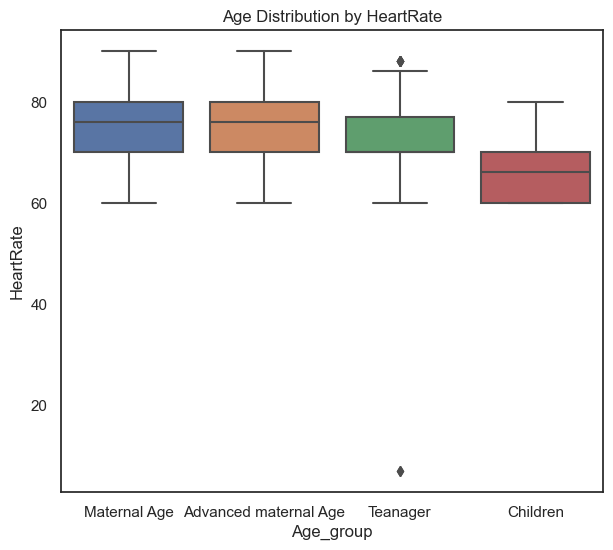

In [33]:
sns.set(rc={'figure.figsize': (7,6)}, font_scale=1.0, style ='white')
sns.boxplot(data=df, x ='Age_group', y='HeartRate')
plt.title('Age Distribution by HeartRate')
plt.show()

## Blood pressure is recorded with 2 numbers: the systolic pressure and diastolic blood pressure. Assume, the high systolic blood pressure starts from 140, the high diastolic blood pressure starts from 90. The normal systolic pressure is in the range (110, 140). The normal diastolic blood pressure is in the range (70, 90). The low systolic pressure is lower than 110, and low diastolic is less than 70.

Describe how would you investigate associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure.

In [34]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group
0,25,130,80,15.0,98.0,86,2,Maternal Age
1,35,140,90,13.0,98.0,70,2,Maternal Age
2,29,90,70,8.0,100.0,80,2,Maternal Age
3,30,140,85,7.0,98.0,70,2,Maternal Age
4,35,120,60,6.1,98.0,76,0,Maternal Age
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,Maternal Age
1010,55,120,90,18.0,98.0,60,2,Advanced maternal Age
1011,35,85,60,19.0,98.0,86,2,Maternal Age
1012,43,120,90,18.0,98.0,70,2,Advanced maternal Age


In [35]:
#Systolic BP pressure
condition=[(df['SystolicBP'] >= 140), (df['SystolicBP'] >= 110) & (df['SystolicBP'] <= 139),(df['SystolicBP'] < 110)]
value = ['High', 'Normal', 'Low']
df['SBP_pressure'] = np.select(condition, value)

#Diastolic BP pressure
condition=[(df['DiastolicBP'] >= 90), (df['DiastolicBP'] >= 70) & (df['DiastolicBP'] <= 89),(df['DiastolicBP'] < 70)]
value = ['High', 'Normal', 'Low']
df['DBP_pressure'] = np.select(condition, value)

In [36]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group,SBP_pressure,DBP_pressure
0,25,130,80,15.0,98.0,86,2,Maternal Age,Normal,Normal
1,35,140,90,13.0,98.0,70,2,Maternal Age,High,High
2,29,90,70,8.0,100.0,80,2,Maternal Age,Low,Normal
3,30,140,85,7.0,98.0,70,2,Maternal Age,High,Normal
4,35,120,60,6.1,98.0,76,0,Maternal Age,Normal,Low
...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,Maternal Age,Normal,Low
1010,55,120,90,18.0,98.0,60,2,Advanced maternal Age,Normal,High
1011,35,85,60,19.0,98.0,86,2,Maternal Age,Low,Low
1012,43,120,90,18.0,98.0,70,2,Advanced maternal Age,Normal,High


In [37]:
##one hot encode the new values
ohe1 = OneHotEncoder()
ohe2 = OneHotEncoder()

sbp_ohe = ohe1.fit_transform(df[['SBP_pressure']])
dbp_ohe = ohe2.fit_transform(df[['DBP_pressure']])

# column_lables = ohe.categories_
# column_lables = np.array(column_lables).ravel()
# column_lables
# ohe2.get_feature_names_out()

# Add the one hot encoded values to the column names
df = pd.concat([df, pd.DataFrame(sbp_ohe.toarray(), columns=ohe1.get_feature_names_out())], axis=1)
df = pd.concat([df, pd.DataFrame(dbp_ohe.toarray(), columns=ohe2.get_feature_names_out())], axis=1)

# Drop the original categorical columns
df = df.drop(['SBP_pressure', 'DBP_pressure'], axis=1)

In [38]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group,SBP_pressure_High,SBP_pressure_Low,SBP_pressure_Normal,DBP_pressure_High,DBP_pressure_Low,DBP_pressure_Normal
0,25,130,80,15.0,98.0,86,2,Maternal Age,0.0,0.0,1.0,0.0,0.0,1.0
1,35,140,90,13.0,98.0,70,2,Maternal Age,1.0,0.0,0.0,1.0,0.0,0.0
2,29,90,70,8.0,100.0,80,2,Maternal Age,0.0,1.0,0.0,0.0,0.0,1.0
3,30,140,85,7.0,98.0,70,2,Maternal Age,1.0,0.0,0.0,0.0,0.0,1.0
4,35,120,60,6.1,98.0,76,0,Maternal Age,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,Maternal Age,0.0,0.0,1.0,0.0,1.0,0.0
1010,55,120,90,18.0,98.0,60,2,Advanced maternal Age,0.0,0.0,1.0,1.0,0.0,0.0
1011,35,85,60,19.0,98.0,86,2,Maternal Age,0.0,1.0,0.0,0.0,1.0,0.0
1012,43,120,90,18.0,98.0,70,2,Advanced maternal Age,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
new_df = df.drop(['Age', 'Age_group', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'], axis=1)

In [44]:
new_df

,SBP_pressure_High,SBP_pressure_Low,SBP_pressure_Normal,DBP_pressure_High,DBP_pressure_Low,DBP_pressure_Normal
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1009,0.0,0.0,1.0,0.0,1.0,0.0
1010,0.0,0.0,1.0,1.0,0.0,0.0
1011,0.0,1.0,0.0,0.0,1.0,0.0
1012,0.0,0.0,1.0,1.0,0.0,0.0


In [45]:
# Calculate frequent itemsets with minimum support of 0.05 
freq_item = apriori(new_df, min_support=0.05, use_colnames=True)
freq_item

C:\Users\x\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.128205,(SBP_pressure_High)
1,0.339250,(SBP_pressure_Low)
2,0.532544,(SBP_pressure_Normal)
3,0.272189,(DBP_pressure_High)
4,0.316568,(DBP_pressure_Low)
5,0.411243,(DBP_pressure_Normal)
6,0.115385,"(SBP_pressure_High, DBP_pressure_High)"
7,0.266272,"(SBP_pressure_Low, DBP_pressure_Low)"
8,0.063116,"(SBP_pressure_Low, DBP_pressure_Normal)"
9,0.146943,"(DBP_pressure_High, SBP_pressure_Normal)"


## Calculating the Support, Confidence, Conviction and Lift

In [46]:
# Generate the rules with minimum confidence of 0.8
rules = association_rules(freq_item, metric="confidence", min_threshold=0.8)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SBP_pressure_High),(DBP_pressure_High),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107
1,(DBP_pressure_Low),(SBP_pressure_Low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835
2,(DBP_pressure_Normal),(SBP_pressure_Normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545


In [47]:
# Calculate conviction and lift for the rules

# lift = support / (support_a * support_b)
#convinction = (1 - support_b)/(1-confidence)

rules["lift"] = rules["support"] / (rules["antecedent support"] * rules["consequent support"])
rules["conviction"] = (1 - rules["support"]) / (1 - rules["confidence"])

In [48]:
print("Frequent itemsets:\n", freq_item)
print("\nAssociation rules:\n", rules[["antecedents", "consequents", "support", "confidence", "conviction", "lift"]])

Frequent itemsets:
      support                                    itemsets
0   0.128205                         (SBP_pressure_High)
1   0.339250                          (SBP_pressure_Low)
2   0.532544                       (SBP_pressure_Normal)
3   0.272189                         (DBP_pressure_High)
4   0.316568                          (DBP_pressure_Low)
5   0.411243                       (DBP_pressure_Normal)
6   0.115385      (SBP_pressure_High, DBP_pressure_High)
7   0.266272        (SBP_pressure_Low, DBP_pressure_Low)
8   0.063116     (SBP_pressure_Low, DBP_pressure_Normal)
9   0.146943    (DBP_pressure_High, SBP_pressure_Normal)
10  0.050296     (DBP_pressure_Low, SBP_pressure_Normal)
11  0.335306  (DBP_pressure_Normal, SBP_pressure_Normal)

Association rules:
              antecedents            consequents   support  confidence  \
0    (SBP_pressure_High)    (DBP_pressure_High)  0.115385    0.900000   
1     (DBP_pressure_Low)     (SBP_pressure_Low)  0.266272    0.841121   

## Clusters of patients with similar Systolic BP

In [49]:
from sklearn.cluster import KMeans
   
distortions = []
K =range (1, 10)
   
for k in K:
       
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(X)
       
        distortions.append(kmeans_model.inertia_)

C:\Users\x\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\x\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\x\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\x\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

C:\Users\x\AppData\Local\Temp\ipykernel_15484\1791746702.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-', color = 'blue')


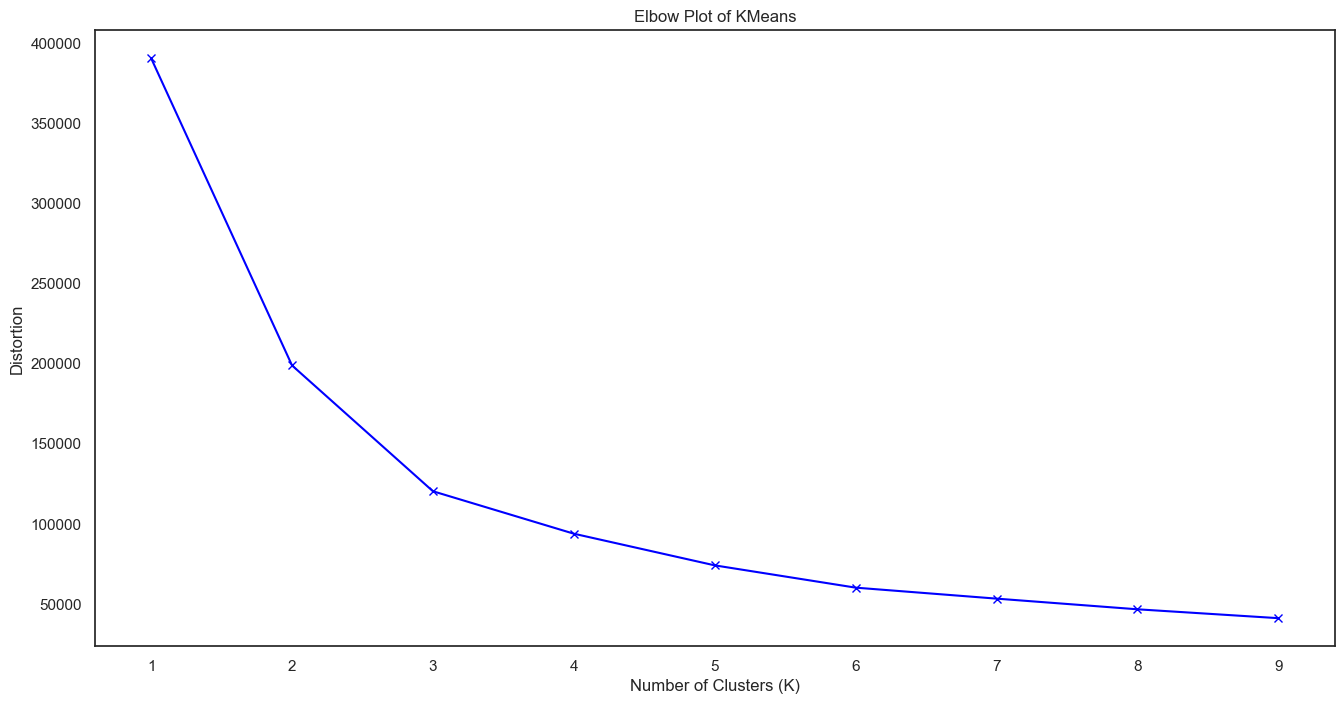

<Figure size 700x600 with 0 Axes>

In [50]:
figure = plt.subplots(figsize = (16, 8))
plt.plot(K, distortions, 'bx-', color = 'blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion")
plt.title("Elbow Plot of KMeans")
plt.show()
plt.savefig('Elbow Plot of KMeans.png')

In [52]:
X= df.drop(['SystolicBP','Age_group', 'SBP_pressure_High', 'SBP_pressure_Low', 'SBP_pressure_Normal', 'DBP_pressure_High', 'DBP_pressure_Low', 'DBP_pressure_Normal'], axis=1)
y= df['SystolicBP']

# let's scale the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

scaled_X.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.361738,0.255023,1.905890,-0.485215,1.446956,1.402991
1,0.380777,0.975539,1.298340,-0.485215,-0.532088,1.402991
2,-0.064732,-0.465493,-0.220537,0.973884,0.704815,1.402991
3,0.009519,0.615281,-0.524312,-0.485215,-0.532088,1.402991
4,0.380777,-1.186009,-0.797710,-0.485215,0.210054,-1.075464


In [53]:
# building the cluster model and predict

kmeans_model = KMeans(n_clusters=3)

scaled_X['clusters'] = kmeans_model.fit_predict(scaled_X)

C:\Users\x\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


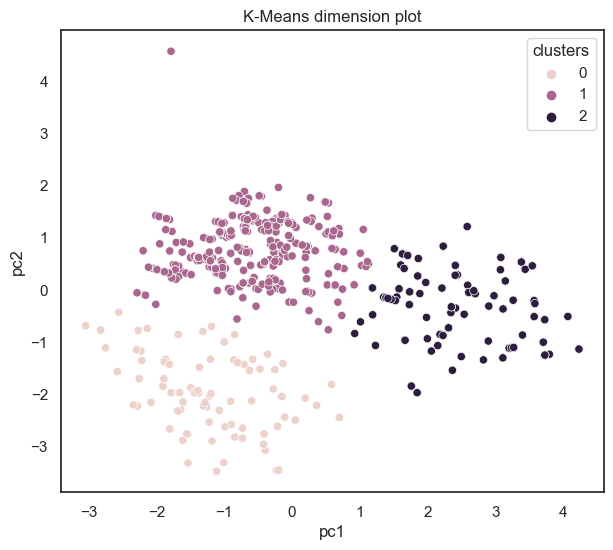

In [54]:
#Visualizing the clusters.
#We would apply PCA on the resulting values to be able to plot a scatterplot of the results as we have more than 2 columns

# apply PCA

pca_data = PCA(n_components=2).fit_transform(scaled_X)
new_pca_data = pd.DataFrame(pca_data, columns=['pc1','pc2'])

sns.scatterplot(x="pc1", y="pc2", hue=scaled_X['clusters'], data=new_pca_data)
plt.title('K-Means dimension plot')
plt.show()

## Correlation between age and Systolic BP


In [55]:
# calculating the correlation between age and Systolic BP. N:B: we will compare this value with the value of the heatmap gotten above.
correlation = df['Age'].corr(df['SystolicBP'])

print(f"The correlation between age and Systolic BP is: {correlation:.2f}")

The correlation between age and Systolic BP is: 0.42


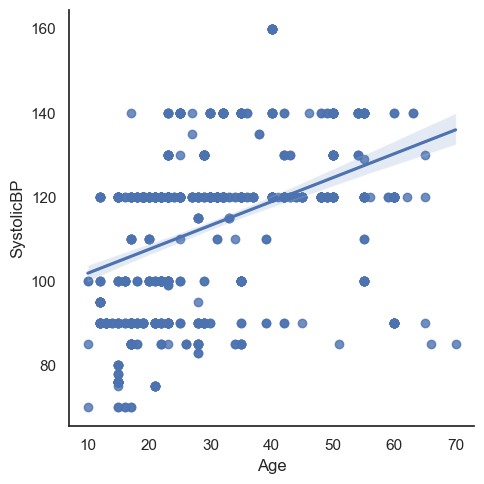

In [56]:
sns.lmplot(x='Age', y='SystolicBP', data=df);
plt.savefig('systolic_bp_age_plot.png')